### Reommender - Matrix Factorization

The goal of this project is to recommend movie to a certain user. I am going to use Matrix Factorization to train a user matrix and a movie matrix. 

##### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter

In [2]:
rating = pd.read_csv('rating.csv')

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
print('number of rows: ', rating.shape[0])

number of rows:  20000263


In [5]:
print('Total number of movies being rate: ' , rating.movieId.nunique())
print('Total number of clients who rated: ', rating.userId.nunique())

Total number of movies being rate:  26744
Total number of clients who rated:  138493


##### data set too large, subsample

In [3]:
#number of users and items we are going to keep
n = 1000
m = 200

In [4]:
# only keep the top users and top items
user_ids_count = Counter(rating.userId)
item_ids_count = Counter(rating.movieId)

user_ids = [u for u, c in user_ids_count.most_common(n)]
item_ids = [m for m, c in item_ids_count.most_common(m)]

In [5]:
rating_sub = rating[(rating.userId.isin(user_ids)) & (rating.movieId.isin(item_ids))]

In [6]:
print('After Sub-sample:')
print('number of rows: ', rating_sub.shape[0])

After Sub-sample:
number of rows:  167035


##### Reindex

In [7]:
new_user_id_map = {}
i = 0
for old in user_ids:
    new_user_id_map[old] = i
    i += 1
print('i: ', i)
    

i:  1000


In [8]:
new_movie_id_map = {}
j = 0
for old in item_ids:
    new_movie_id_map[old] = j
    j += 1
print('j:',j)

j: 200


In [9]:
rating_sub.loc[:,'userId'] = rating_sub.apply(lambda row: new_user_id_map[row.userId], axis= 1)
rating_sub.loc[:,'movieId'] = rating_sub.apply(lambda row: new_movie_id_map[row.movieId], axis = 1)

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
print('max user id: ', rating_sub.userId.max())
print('max movie id: ', rating_sub.movieId.max())

max user id:  999
max movie id:  199


##### split in train and test data set

In [11]:
rating_sub = shuffle(rating_sub)

In [12]:
cutoff = 0.8
df_train = rating_sub.iloc[:int(cutoff * len(rating_sub))]
df_test = rating_sub.iloc[int(cutoff * len(rating_sub)):]



#### Convert data frame to dicitonary

In [13]:
user2movie = {}
movie2user = {}
usermovie2rating = {}


In [14]:
def df_to_dict(row):
    user_id = row.userId
    movie_id = row.movieId
    r = row.rating
    
    if user_id not in user2movie:
        user2movie[user_id] = [movie_id]
    else:
        user2movie[user_id].append(movie_id)
        
    if movie_id not in movie2user:
        movie2user[movie_id] = [user_id]
    else:
        movie2user[movie_id].append(user_id)
        
    usermovie2rating[(user_id, movie_id)] = r

In [15]:
df_train.apply(df_to_dict, axis = 1)

10540675    None
19109762    None
12439004    None
6104724     None
255928      None
1542834     None
4545215     None
18795622    None
8790650     None
3902462     None
7288610     None
7638629     None
19382642    None
6305830     None
11805067    None
14624770    None
6302787     None
18496943    None
12822063    None
5389945     None
13045082    None
115084      None
18098478    None
12397509    None
18048322    None
18471158    None
15198674    None
14934613    None
13463145    None
19451761    None
            ... 
18886112    None
15942991    None
3463798     None
10069746    None
15107087    None
3681642     None
1989072     None
7877948     None
17085780    None
2994461     None
10866541    None
15222133    None
14913040    None
15488547    None
4377756     None
14010717    None
26131       None
9846938     None
9417952     None
13694827    None
13490972    None
3608878     None
16472272    None
17413225    None
15917943    None
17086600    None
19095176    None
15801813    No

In [16]:
usermovie2rating_test = {}

def df_to_dict_test(row):
    user_id = row.userId
    movie_id = row.movieId
    r = row.rating
    
    usermovie2rating_test[(user_id, movie_id)] = r
    
df_test.apply(df_to_dict_test, axis = 1)

17209646    None
6233449     None
10413713    None
17621605    None
4339261     None
5335046     None
17863406    None
17627555    None
8814268     None
3453714     None
7089675     None
15177094    None
9845560     None
6779511     None
1128871     None
14686125    None
14884197    None
14956427    None
11499938    None
3807031     None
5957228     None
5032058     None
7800572     None
18656134    None
3624143     None
14311033    None
11614434    None
1226622     None
18832748    None
15648915    None
            ... 
8364737     None
19152930    None
81530       None
17874691    None
4197298     None
9543482     None
5958627     None
3137823     None
13783350    None
8690128     None
8089400     None
18737426    None
7384861     None
355680      None
12555775    None
14257293    None
7480860     None
16908249    None
10144589    None
17047873    None
19522794    None
15165473    None
7325856     None
5820290     None
19095123    None
1637177     None
874954      None
18746549    No

In [17]:
N = np.max(list(user2movie.keys())) + 1

In [18]:
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print('N: ', N, 'M: ', M)

N:  1000 M:  200


### Matrix Factorization

##### Loss Function

In [19]:
def get_cost(d):
    # intput - d: (user_id, movie_id) -> rating
    N = float(len(d))
    sse = 0
    for k, r in d.items():
        i, j = k
        p = W[i].dot(U[j]) + b[i] + c[j] + mu
        sse += (p - r) * (p - r)
    return sse / N

In [32]:
K = 10 # set K to be 10 first

# initialize parameters
W = np.random.randn(N, K)
b = np.random.randn(N)
U = np.random.randn(M, K)
c = np.random.randn(M)
mu = np.mean(list(usermovie2rating.values()))

In [33]:
cTrain = []
cTest = []
T = 25
reg = 20.

In [34]:

for t in range(T):
    print('epoch: ', t)

    for i in range(len(W)):
        ##¥print('i: ', i)
        movie_i = user2movie[i]
        An = np.eye(K) * reg
        bn = np.zeros(K)
        
        bi = 0
        
        for j in movie_i:
            #print('j: ', j)
            An += U[j].reshape(-1,1).dot(U[j].reshape(-1,1).T)
            #print('successfully created An')
            bn += (usermovie2rating[i, j] - b[i] - c[j] - mu ) * U[j]
            #print('successfully created bn')
            bi += usermovie2rating[i, j]  - W[i].dot(U[j]) - c[j] - mu
        W[i] = np.linalg.solve(An, bn)
        b[i] = bi / (len(movie_i) + reg)
        
    for k in range(len(U)):
        user_k = movie2user[k]
        An = np.eye(K) * reg
        bn = np.zeros(K)
        
        cj = 0
        for g in user_k:
            An += W[g].reshape(-1,1).dot(W[g].reshape(-1,1).T)
            bn += (usermovie2rating[g,k] - b[g] - c[k] - mu ) * W[g]
            
            cj += usermovie2rating[g,k] - W[g].dot(U[k]) - b[g] - mu
            
        U[k] = np.linalg.solve(An, bn)
        c[k] = cj / (len(user_k) + reg)
        
    cTrain.append(get_cost(usermovie2rating))
    cTest.append(get_cost(usermovie2rating_test))
        
        
    
    

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


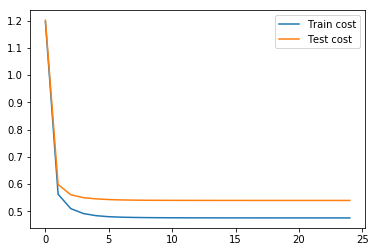

In [35]:
plt.plot(cTrain, label = 'Train cost')
plt.plot(cTest, label = 'Test cost')
plt.legend()
plt.show()

##### Prediction

In [79]:
i = 558
j = 34
print('user id: ', i, 'movie id: ', j)
print('True Value:', usermovie2rating_test[i,j])

print('predicted value: ', W[i].dot(U[j]) + b[i] + c[j] + mu)

user id:  558 movie id:  34
True Value: 3.5
predicted value:  3.77547561056


In [128]:
i = 0
print('want to recommend 5 movies to user',i, ': ')
predict_df = pd.DataFrame(W[i].dot(U.T) + b[i] + c + mu)
predict_df.columns = ['predicted_rating']
print('top 5 movies are')
print(predict_df.loc[~predict_df.index.isin(user2movie[0])].sort_values(by = 'predicted_rating',ascending=False ).head())

want to recommend 5 movies to user 0 : 
top 5 movies are
     predicted_rating
28           4.744348
9            4.513282
21           4.410120
165          4.379961
8            4.314974


##### Analyzing Result 

In [68]:
W_df= pd.DataFrame(W)

In [45]:
U_df = pd.DataFrame(U)

In [73]:
print('After Training, we have two matrix')
print('User matrix - probability of User i like Cluster k')
print(W_df.head())
print('')
print('Movie matrix - probabiity of movie j belong to Cluster k ')
print( U_df.head())

After Training, we have two matrix
User matrix - probability of User i like Cluster k
          0         1         2         3         4         5         6  \
0  0.076487 -0.222724  0.028498  0.052415  0.001157  0.071652 -0.199599   
1  0.061460  0.115309  0.118425  0.041710 -0.281888 -0.267685  0.048051   
2  0.259745 -0.089040 -0.000281 -0.359758 -0.261721 -0.174208  0.096808   
3  0.105780 -0.170215  0.054869 -0.036437 -0.187263  0.050420 -0.301187   
4  0.022427 -0.050671  0.005261  0.075257 -0.145920  0.050325 -0.035692   

          7         8         9  
0  0.084531  0.097792  0.018645  
1  0.150554 -0.057572  0.174765  
2  0.075526 -0.338911 -0.085178  
3  0.204717  0.130516  0.175479  
4 -0.037501 -0.006106 -0.012336  

Movie matrix - probabiity of movie j belong to Cluster k 
          0         1         2         3         4         5         6  \
0 -0.725820 -0.069071 -0.096486 -0.165696 -0.282852  0.319299  0.709175   
1 -1.014521 -0.482684  0.049138 -0.029934 -0.27494

In [80]:
print('top 5 movies in the 2nd cluster')
print(U_df.sort_values(by = 2, ascending=False).loc[:,2].head())

top 5 movies in the 2nd cluster
40     1.399916
56     1.338271
33     1.321046
199    1.183577
64     1.047270
Name: 2, dtype: float64
